# End of Distribution imputation

#### MNAR( Missing not at random) — values are not missing at random.


### All the techniques of handling ,missing values

1. Mean/ Median/Mode imputation
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [98]:
import pandas as pd 

In [99]:
df = pd.read_csv('titanic dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:

df1 = pd.read_csv('titanic dataset.csv', usecols=['Age','Fare','Survived'])

df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

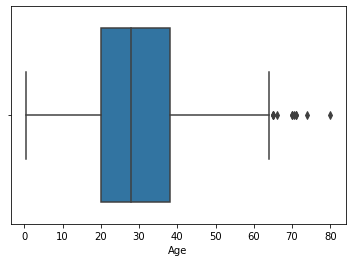

In [103]:
import seaborn as sns
sns.boxplot('Age',data= df1)

<AxesSubplot:>

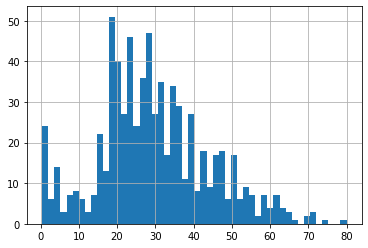

In [104]:
df1.Age.hist(bins=50)

we are going to take the value from end of the distrubution.
we are taking taking the valye after 3rd std deviation.

In [105]:
end_distri = df1.Age.mean() + 3*df1.Age.std()
median = df1.Age.median()
end_distri, median

(73.27860964406095, 28.0)

In [106]:
def impute_nan(dframe,feature,median, end_distrubution):
    dframe[feature+"_End_distribution"] = dframe[feature].fillna(end_distrubution)
    dframe[feature+"_median"] = dframe[feature].fillna(median)

In [107]:
impute_nan(df1,'Age',median,end_distri)

In [108]:
df1.head(10)

,Survived,Age,Fare,Age_End_distribution,Age_median
0,0,22.0,7.2500,22.00000,22.0
1,1,38.0,71.2833,38.00000,38.0
2,1,26.0,7.9250,26.00000,26.0
3,1,35.0,53.1000,35.00000,35.0
4,0,35.0,8.0500,35.00000,35.0
5,0,NaN,8.4583,73.27861,28.0
6,0,54.0,51.8625,54.00000,54.0
7,0,2.0,21.0750,2.00000,2.0
8,1,27.0,11.1333,27.00000,27.0
9,1,14.0,30.0708,14.00000,14.0


<AxesSubplot:>

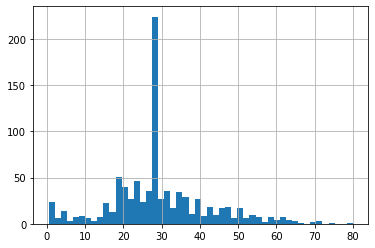

In [109]:
df1.Age_median.hist(bins=50)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_median'>

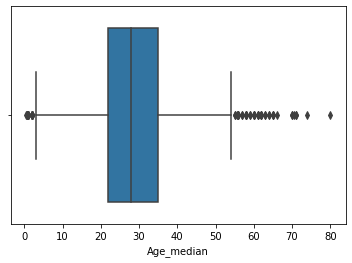

In [110]:
sns.boxplot('Age_median',data= df1)

<AxesSubplot:>

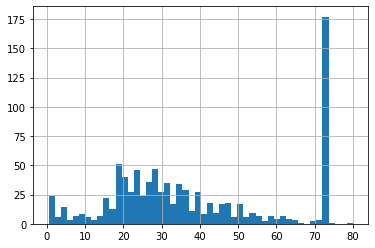

In [111]:
df1.Age_End_distribution.hist(bins=50)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_End_distribution'>

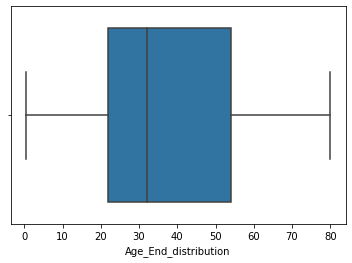

In [112]:
sns.boxplot('Age_End_distribution',data= df1)

# As we can see end distribution has captured outlier 

# checking the distrubution between median and End distribution with KDE 

In [113]:

import matplotlib.pyplot as plt
%matplotlib inline

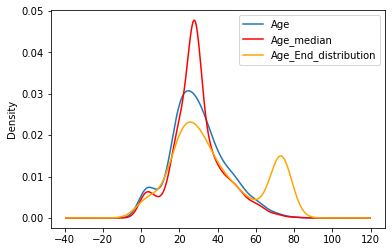

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['Age'].plot(kind='kde', ax=ax)

df1.Age_median.plot(kind='kde', ax=ax, color='red')
df1.Age_End_distribution.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

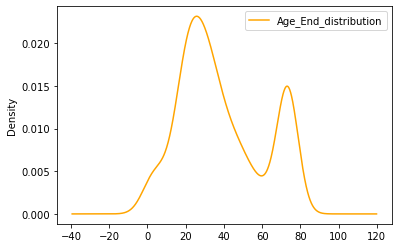

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)


df1.Age_End_distribution.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy to implement
2. Capture the importance of missingess

#### Disadvantage
1. distorts the original distribution.
2. if thee number of NA is big, it will mask true outliers in the distribution.
3. if the number of NA is small, the replaced may consider outlier.